In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [101]:
data = "../traces_TCA/traces_TCA.json"

In [102]:
df = pd.read_json(data)

df['exec_label'] = df['execution_accuracy'].map({0: 'Failed (0)', 1: 'Success (1)'})
difficulty_order = ["simple", "medium", "challenging"]

sns.set_theme(style="whitegrid", context="notebook")

In [103]:
acc_by_diff = (
    df.groupby("difficulty")["execution_accuracy"]
      .mean()
      .reindex(["simple", "medium", "challenging"])
)

acc_by_diff_pct = acc_by_diff * 100

for diff, acc in acc_by_diff_pct.items():
    print(f"{diff}: {acc:.2f}%")

simple: 65.00%
medium: 59.87%
challenging: 42.31%


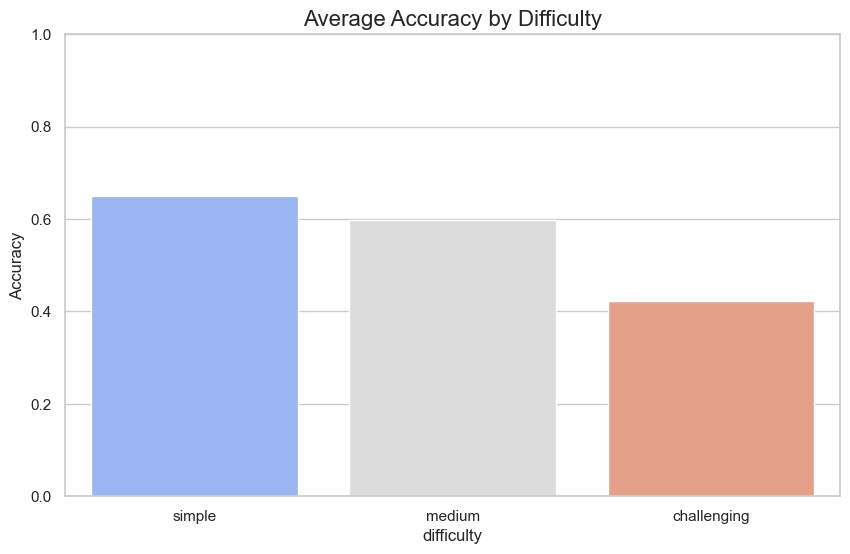

In [104]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df, 
    x="difficulty", 
    y="execution_accuracy", 
    hue="difficulty",
    legend=False,
    order=difficulty_order, 
    errorbar=None, 
    palette="coolwarm"
)
plt.title("Average Accuracy by Difficulty", fontsize=16)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

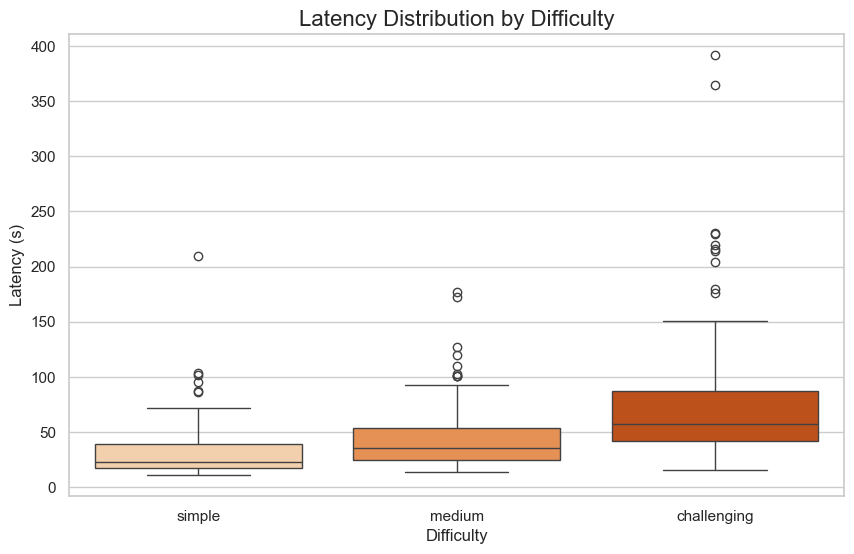

In [105]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, 
    x="difficulty", 
    y="latency", 
    hue="difficulty",
    legend=False,
    order=difficulty_order, 
    palette="Oranges"
)
plt.title("Latency Distribution by Difficulty", fontsize=16)
plt.ylabel("Latency (s)")
plt.xlabel("Difficulty")
plt.show()

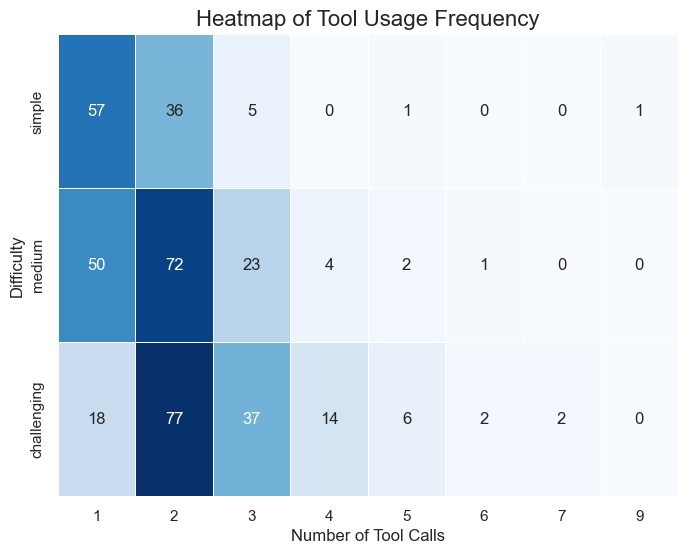

In [106]:
plt.figure(figsize=(8, 6))

heatmap_data = pd.crosstab(df['difficulty'], df['tool_call_count'])
heatmap_data = heatmap_data.reindex(difficulty_order)

sns.heatmap(
    heatmap_data, 
    annot=True,
    fmt="d",        
    cmap="Blues",
    linewidths=.5,
    cbar=False
)

plt.title("Heatmap of Tool Usage Frequency", fontsize=16)
plt.ylabel("Difficulty")
plt.xlabel("Number of Tool Calls")
plt.show()

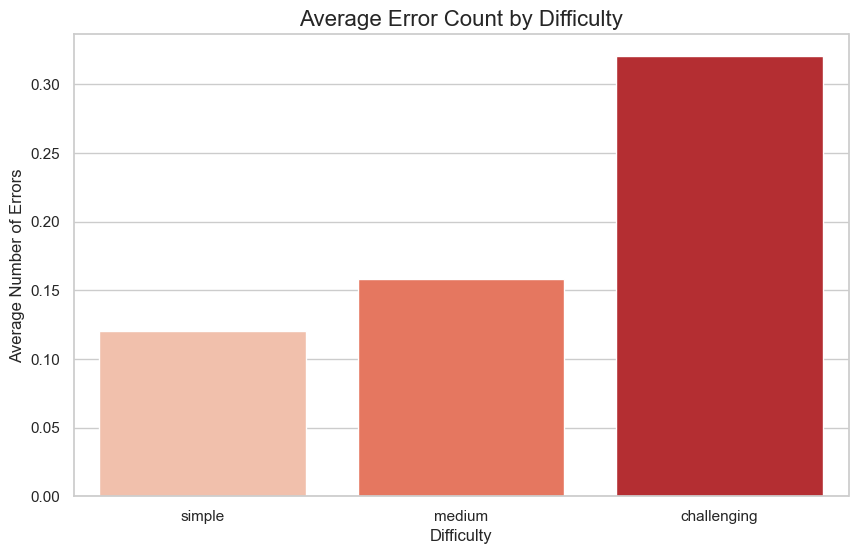

In [107]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=df, 
    x="difficulty", 
    y="error_count", 
    hue="difficulty",
    legend=False,
    order=difficulty_order, 
    palette="Reds",
    errorbar=None
)


plt.title("Average Error Count by Difficulty", fontsize=16)
plt.ylabel("Average Number of Errors")
plt.xlabel("Difficulty")
plt.show()

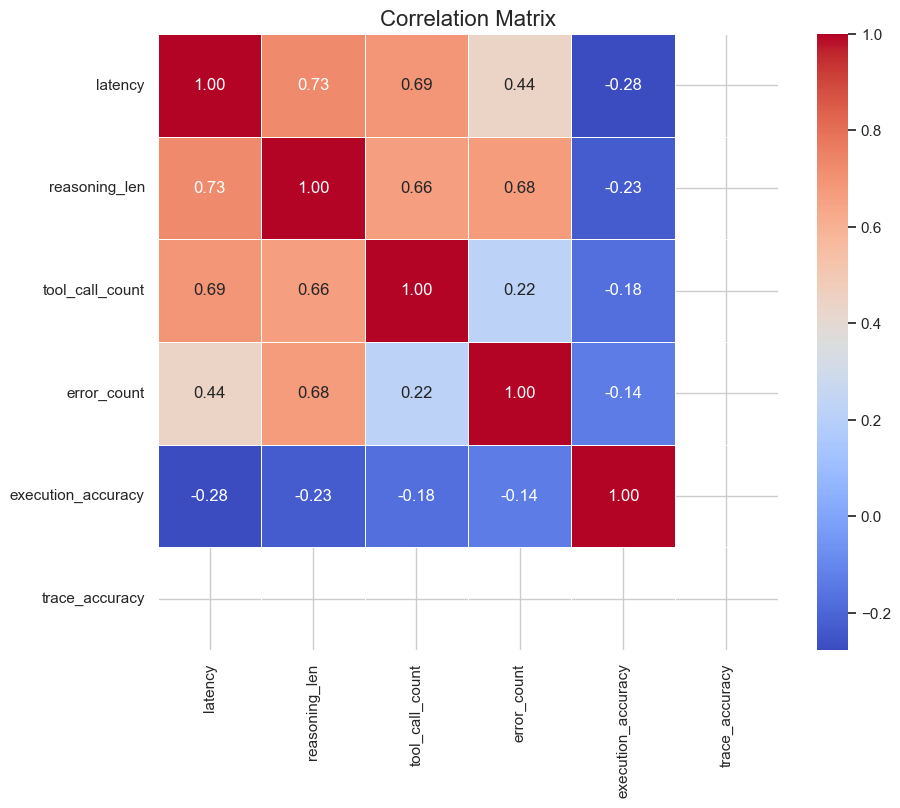

In [108]:
plt.figure(figsize=(10, 8))
numeric_cols = df[['latency', 'reasoning_len', 'tool_call_count', "error_count", 'execution_accuracy', 'trace_accuracy']]
corr_matrix = numeric_cols.corr()

sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=.5
)
plt.title("Correlation Matrix", fontsize=16)
plt.show()